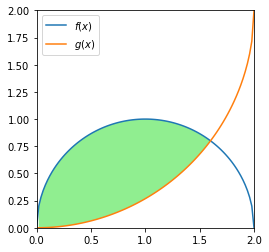

In [25]:
from random import random
import matplotlib.pyplot as plt
import numpy as np
import statistics 
def f(x):
    return np.sqrt(1-(x-1)**2)
def g(x):
    return 2-np.sqrt(-x**2+4)

x1 = np.linspace(0,2,100)
y1 = f(x1)
y2 = g(x1)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
ax1.plot(x1, y1, label="$f(x)$")
ax1.plot(x1, y2, label="$g(x)$")
ax1.legend(loc="upper left")
ax1.set_xlim(0,2)
ax1.set_ylim(0,2)
ax1.fill_between(x1, y1, y2, where=y1>y2, facecolor='lightgreen')
plt.show()


In [15]:
## Montecarlo Problem

def MC(N, f, g, xstart, xend, ystart, yend):
   
    w = xend - xstart
    h = yend - ystart
    count = 0
    
    for i in range(N):
        x = w*random() + xstart
        y = h*random() + ystart
        if (y < f(x) and y > g(x)):
            count += 1
    I = w*h*count/N
    
    return I

In [16]:
print(MC(100,f,g,0,2,0,2))
print(MC(1000,f,g,0,2,0,2))
print(MC(10000,f,g,0,2,0,2))
print(MC(100000,f,g,0,2,0,2))
## This is the area of the shaded region over a sample of N size

0.96
0.984
0.9988
0.96952


In [38]:
## In order to find our variances we want to be able to loop through the different N ranges
## to find our differences with the sampling pool thus helping improve the accuracy of our set
def stat(N, f, g, xstart, xend, ystart, yend, k):
    data = np.zeros(k)
    
    for i in range(k):
        data[i]=MC(N,f,g,xstart,xend,ystart,yend)
        
    return np.var(data)
    
    

In [39]:
k = 100
kdiff = [100,1000,10000,100000]

for i in kdiff:
    print (stat(i, f, g, 0, 2, 0, 2, k,))

0.03531824
0.0031359424000000015
0.0002669249759999999
2.8468047359999988e-05


In [41]:
## So what we can tell from the variance is that the range of accuracy becomes significantly more accurate
## given that the range of N is increased. The larger the sampling pool the more accurate our approximation
## will end up being. 
## The run time of the program will take longer because of such a large sampling size at N = 100000
## but this will help us find a more closer representation of the number that we want to find

In [83]:
from scipy.integrate import quad
r = lambda x: 1/np.sqrt(x)/(np.exp(x)+1)
w = lambda x: 1/np.sqrt(x)
## P(x) = w(x)/integral([a,b]w(x)dx) Our range in this case is from 0 to 1
wint = quad(w,0,1)[0]
print(wint)

2.0000000000000004


In [48]:
## So from here we can just roughly say that wint is 2 thus p(x) = w / 2
## which p(x) = 1/2(sqrt(x))
## we then integrate p(x) to get p(x) = x**(1/2) thus, F(x) = x^1/2, F^-1(x) will then be y = x^2
## 1/N * Sum from 1 to N (fxi/wxi)*wint
## N = 1,000,000

In [102]:
Finverse = lambda x: x*x

In [103]:
def IMC(f, w, F, a, b, N):
    
    
    const = wint
    length = b - a
    I=0
    
    
    for i in range(N):
        x = length*random() + a
        y = F(x)
        I += f(y)/w(y)
        
    return I/N*const
print ("Integral is ",IMC(r,w,Finverse,0,1,1000000))

Integral is  0.8389530010089724


In [109]:
## Part 2
a1 = 3.5e-14 
r2 = lambda x: 1/x/(np.exp(x)+1)
w2 = lambda x: 1/x ## 
w2int = quad(w2,a1,1)[0]
print (w2int) 

30.983428333421266


In [ ]:
## P(x) = (1/x)/(wint)
## integral 1/x = 1/c(lnx) from a to x where x = 1
## 1/c(lnx) - ln(a)
## 1/c(lnx)
## x = 1/c(lny) - lna 
## y = e**c(x + lna)

In [124]:
from math import e, log
ln_a1 = log(a1)
F2inverse = lambda x: e**wint*(x+log(a1))

In [125]:
print (IMC(r2, w2, F2inverse, a1, 1, 1000000))

2.0000000000000004


In [115]:
quad(r2,a1,1)[0]

15.248269868920646